# 개념정리

1. 클러스터(Cluster) : 비슷한 특성을 가진 데이터들끼리 묶는 것
2. 클러스터링(Clustering)
  - 데이터들을 군집으로 묶어주는 작업
  - 라벨링된 데이터를 묶는 작업으로 비지도 학습으로 분류된다.
3. K-means Clustering
  - 각 클러스터에 할당된 데이터 포인터들의 평균 좌표를 이용해 중심점을 반복적으로 업데이트하며 클러스터를 형성하는 알고리즘
  - K는 굽집의 개수를 의미하며 사용자가 조정해야 하는 하이퍼파라미터이다.

4. 중싱점, 도심(Centroid) : 클러스터의 중심

5. K-means 수행광정
  - 클러스터의 수(K) 설정 : n_clusters
  - init 파라미터의 기본값 k-means++ 방식으로 centroid1, 2, ...n개 찾음
  - centroid1에서 제일 멀리 떨어져 있는 데이터를 centroid2로 찾고
  - centroid1, 2와 제일 멀리 떨어진 데이터를 centroid3으로 찾는 방식
  - 각 데이터마다 가장 가까운 중심점에 해당하는 클러스터 할당(가장 가까운 중심점은 유클리드 거리로 찾음)
  - 할당된 클러스터를 기반으로 새로운 중심점을 계산(클러스터의 중심으로 centroid 이동, 새로운 중심점은 내부 점들의 거리의 산술평균으로 찾음)
  - 각 클러스터의 할당이 변하지 않을 때 까지 위의 작업을 반복수행

# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus = False)

sns.set_style('darkgrid')
plt.rc('figure', figsize = (10, 8))

warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()

## 탐색적 데이터 분석 : EDA

In [6]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns = columns)
print(df.shape)

(178, 13)


In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 전처리 - 피처 스케일링

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, :] = scaler.fit_transform(data)

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## 주성분분석(PCA)를 사용해 특성 줄이기

- n_components의 입력매개변수에 따라 두가지 동작을 수행한다.
- 만약 매개변수의 값이 1보다 크면 n_components 개수만큼 특성이 반환된다.(차원이 변환된 결과가 반환된다)
- 이때, 최적의 특성 개수를 어떻게 선택할지 의문이 들 수 있다.
- 원본 특성의 95%나 99%의 분산을 유지한다는 의미로 n_components = 0.95 or 0.99를 사용
- whiten = True로 지정하면 각 주성분의 값을 평균이 0이고 분산이 1이 되도록 반환한다.
- solver = 'randomized'는 아주 짧은 시간 안에 첫번째 주성분을 찾아주는 확률적 알고리즘을 사용한다.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data = pca.fit_transform(data)
data.shape

(178, 2)

In [12]:
df['pca_x'] = data[:, 0]
df['pca_y'] = data[:, 1]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831


In [14]:
# explained_variance_ratio_ 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [15]:
### 55% 정도의 설명력으로, 2차원으로는 설명이 부족하다는 것을 알 수 있음

## K-means 클러스터 찾기

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 200)

In [18]:
kmeans.fit(data)

KMeans(n_clusters=3, random_state=200)

In [21]:
cluster = kmeans.predict(data)

In [22]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
df['cluster'] = cluster
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,0


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

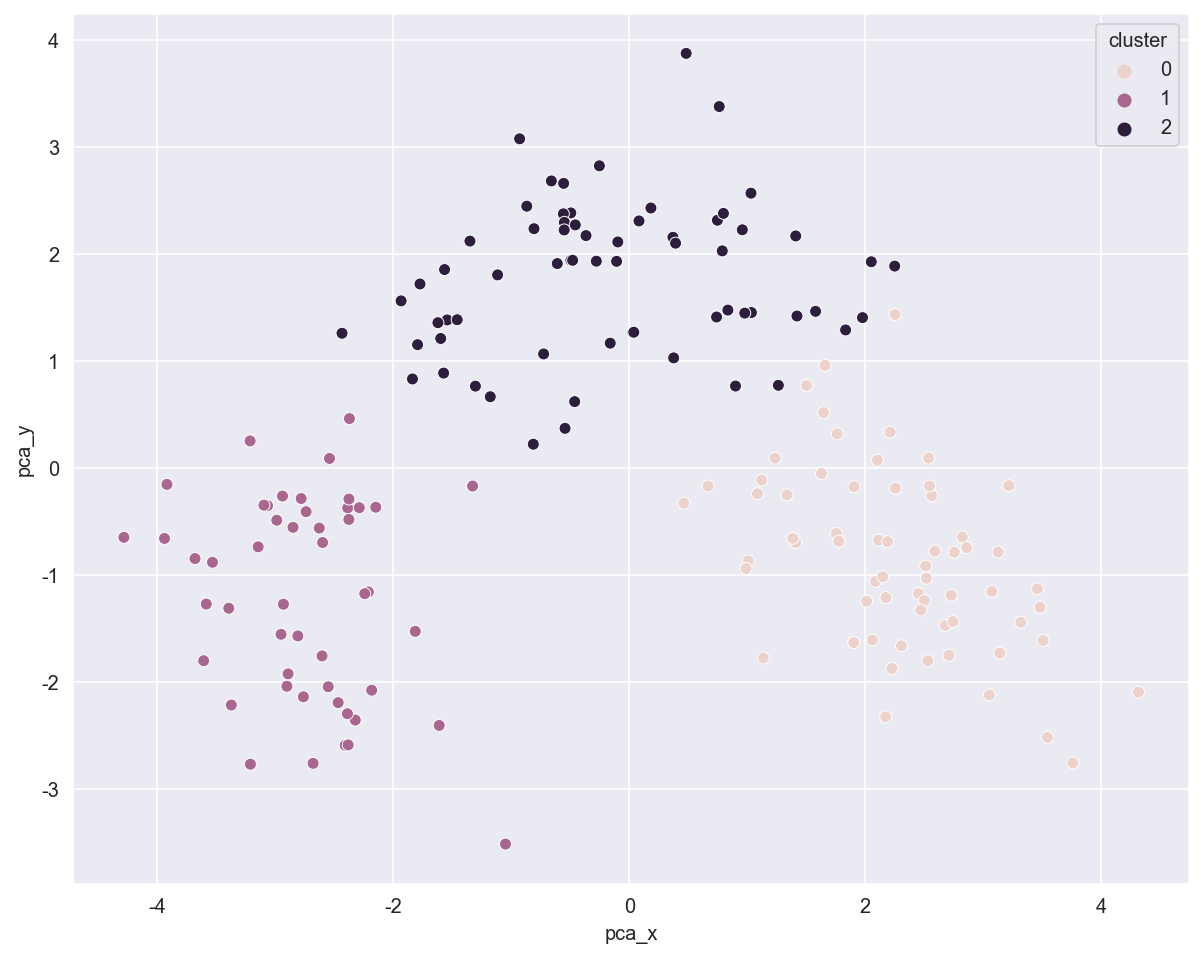

In [27]:
sns.scatterplot(x = 'pca_x', y = 'pca_y', data = df, hue = 'cluster')

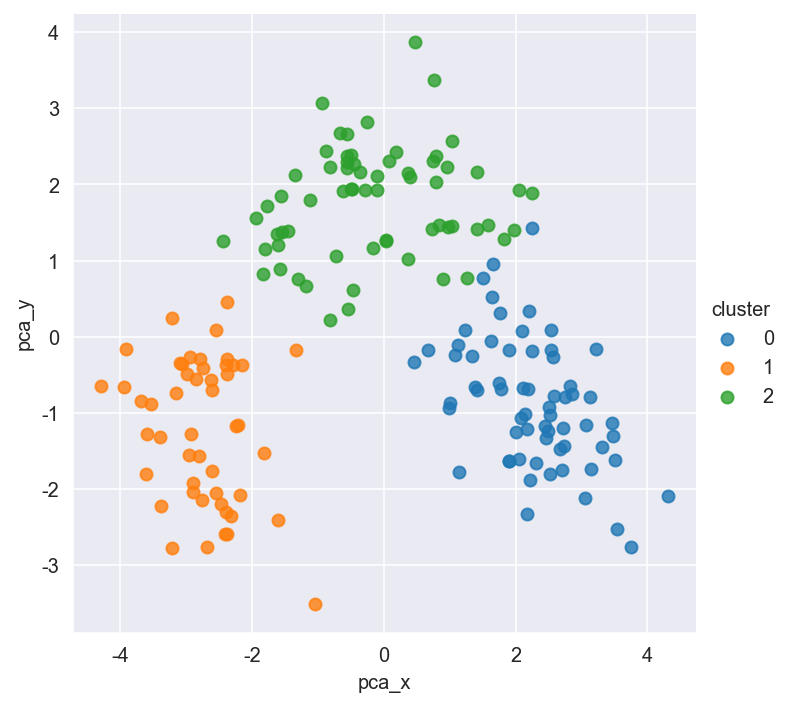

In [26]:
sns.lmplot(x = 'pca_x', y = 'pca_y', data = df, hue = 'cluster', fit_reg = False)

## 중심점 도 포함한 시각화 구현하기

In [28]:
# cluster_centers_ : 중심점의 좌표값이 저장되어있다.
center = kmeans.cluster_centers_
center

array([[ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ],
       [-0.16278513,  1.76758824]])

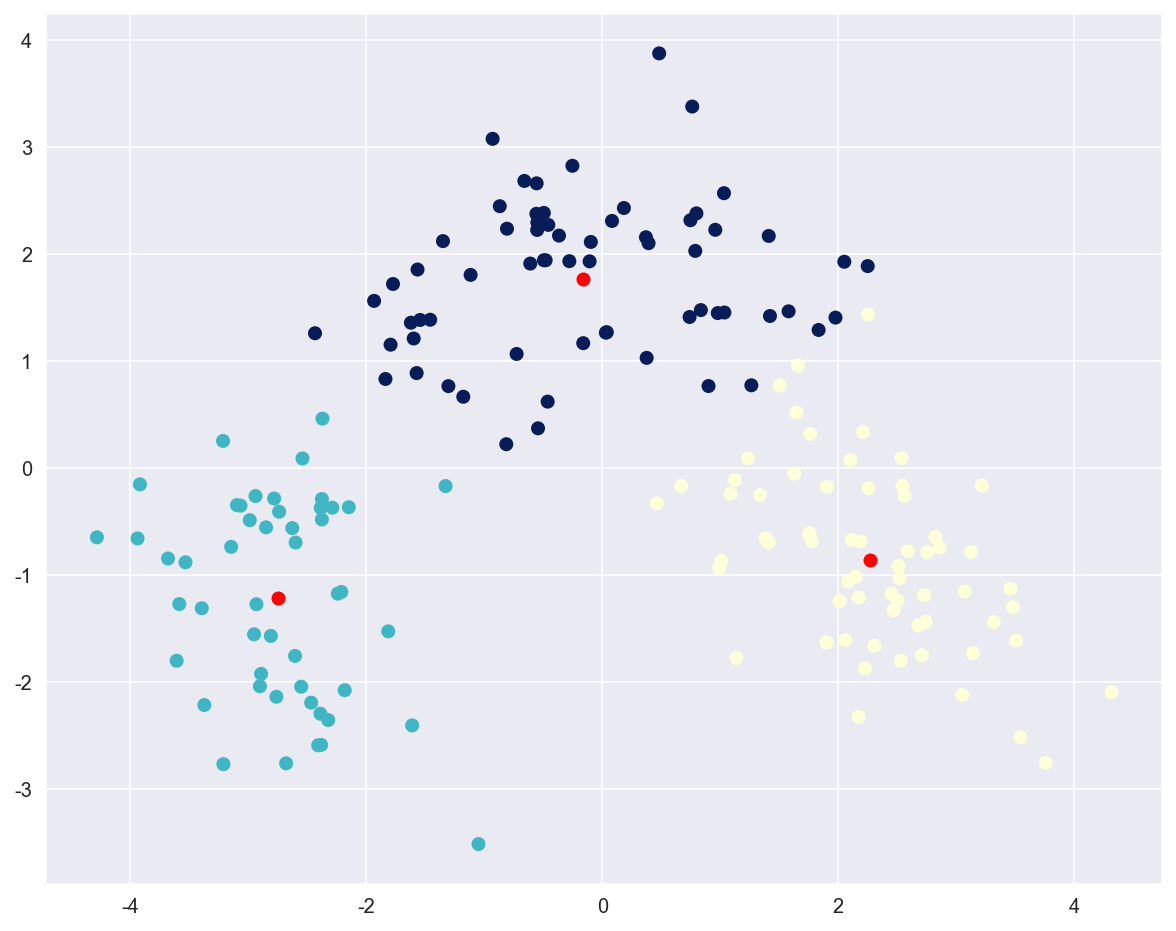

In [31]:
plt.scatter(df['pca_x'], df['pca_y'], c = df['cluster'], cmap = 'YlGnBu')
plt.scatter(center[:, 0], center[:, 1], c = 'red')

## 적절한 군집의 수, K는 어떻게 정할까요? 최적의 K 찾기

- K-means 알고리즘의 단점 중 하나는 클러스터의 개수를 사전에 지정해야 한다는 점이다.
- 사실 군집 알고리즘에서 적절한 k를 찾기 위한 완벽한 방법은 없다. 다만, 대표적인 방법중 하나인 엘보우 방법이 존재한다.

## Elbow Method

- K-means 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다.
- 이 거리의 제곱의 합을 이너셔(inertia)라고 부른다.
- 이너셔(inertia) : 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값
- 일반적으로 클러스터의 개수가 늘어나면 클러스터 개개의 거리의 크기는 줄어들기 때문에 이너셔도 줄어든다.
- 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다.
- 클러스터 개수를 증가시키면서 이너셔를 시각화하면 감소하는 속도가 꺾이는 지점이 있다. 이 지점부터 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다. 즉, 이너셔가 크게 줄어들지 않는다. 이 지점이 마치 팔꿈치 모양이어서 엘보우 방법이라고 부른다. 
- K-means 클래스는 자동으로 이너셔를 계산해서 inertia_ 속성에 담아 제공한다.

In [41]:
inertia = []

for k in range(2, 16) :
    km = KMeans(n_clusters = k, random_state = 200)
    km.fit(data)
    iner = km.inertia_
    inertia.append(iner)
    
    print('k : ', k, " ", 'cost : ', iner)
    
inertia

k :  2   cost :  628.7883507554778
k :  3   cost :  259.5093807511935
k :  4   cost :  192.39061530234858
k :  5   cost :  155.06920474891726
k :  6   cost :  123.43287973008765
k :  7   cost :  99.2481454838704
k :  8   cost :  90.05279491709501
k :  9   cost :  80.74286917591911
k :  10   cost :  73.42282923968276
k :  11   cost :  65.34374421996391
k :  12   cost :  59.44921293992767
k :  13   cost :  57.450190324722556
k :  14   cost :  51.07165420285444
k :  15   cost :  48.13657460125436


[628.7883507554778,
 259.5093807511935,
 192.39061530234858,
 155.06920474891726,
 123.43287973008765,
 99.2481454838704,
 90.05279491709501,
 80.74286917591911,
 73.42282923968276,
 65.34374421996391,
 59.44921293992767,
 57.450190324722556,
 51.07165420285444,
 48.13657460125436]

## Elbow 시각화(Inertia)

In [48]:
min(inertia)

48.13657460125436

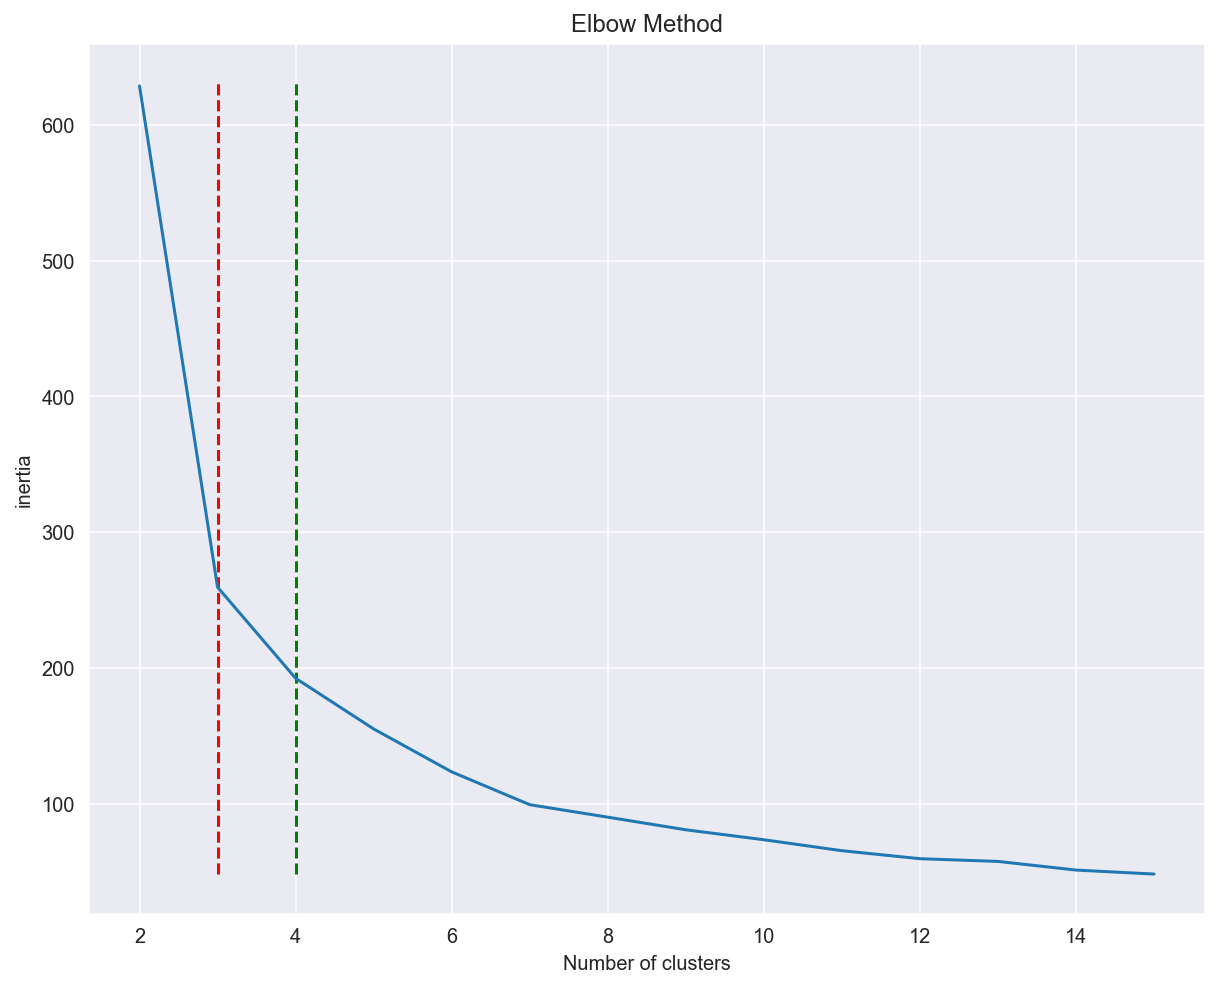

In [54]:
plt.plot(range(2, 16), inertia)
plt.vlines(3, ymin = min(inertia)*0.9999, ymax = max(inertia)*1.003, linestyle = '--', color = 'red')
plt.vlines(4, ymin = min(inertia)*0.9999, ymax = max(inertia)*1.003, linestyle = '--', color = 'green')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

## 군집 평가

- 군집화는 분류와 유사해보이지만 성격이 많이 다르다.
- 데이터 내에 숨어있는 별도의 그룹을 찾아서 의미를 부여한다.
- 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하기도 한다.
- 이러한 군집화가 효율적으로 잘 되었는지 평가할 수 있는 대표적인 방법에 실루엣 분석이 있다.
- 다만, 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기 어렵다

## 실루엣 분석
- 실루엣 분석은 다른 군집과의 거리는 떨어져 있고 동일 군집 데이터끼리 서로 가까운지 나타낸다.
- 실루엣 분석은 실루엣 계수를 기반으로 하며 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다.

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label,random_state=200)

In [57]:
from sklearn.metrics import silhouette_score

k_range = range(2, 30)

In [62]:
best_k = -1
best_silhouette_score = -1

for k in k_range:
    km = KMeans(n_clusters = k, random_state = 200)
    km.fit(data)
    clusters = km.predict(data)
    
    score = silhouette_score(data, clusters)
    
    print('k : ', k, 'score : ', score)
    
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score
        
print('\n best k : ', best_k, '/ best_score :', best_silhouette_score)

k :  2 score :  0.46491409089201524
k :  3 score :  0.5610505693103246
k :  4 score :  0.4914213395710316
k :  5 score :  0.4411644097008514
k :  6 score :  0.44631751360554134
k :  7 score :  0.42357060607218666
k :  8 score :  0.4025336428699397
k :  9 score :  0.3993990585943549
k :  10 score :  0.3839746584864296
k :  11 score :  0.4176124122783136
k :  12 score :  0.40736052501863096
k :  13 score :  0.39361310549842693
k :  14 score :  0.3934456673409443
k :  15 score :  0.3672030741146198
k :  16 score :  0.3986256538646477
k :  17 score :  0.37053763207561224
k :  18 score :  0.3914695343764404
k :  19 score :  0.3807173866923737
k :  20 score :  0.38715567204747137
k :  21 score :  0.382201345681412
k :  22 score :  0.36282361234201155
k :  23 score :  0.38119252217445165
k :  24 score :  0.3695671082299874
k :  25 score :  0.38210689773954976
k :  26 score :  0.35051797078350905
k :  27 score :  0.3682420234984971
k :  28 score :  0.34578596185823607
k :  29 score :  0.370339

In [63]:
best_k = -1
best_silhouette_score = -1

for k in k_range:
    km = KMeans(n_clusters = k, random_state = 200)
    km.fit(X_train)
    clusters = km.predict(X_train)
    
    score = silhouette_score(X_train, clusters)
    
    print('k : ', k, 'score : ', score)
    
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score
        
print('\n best k : ', best_k, '/ best_score :', best_silhouette_score)

k :  2 score :  0.45928269778057973
k :  3 score :  0.5616393631207302
k :  4 score :  0.491894802908737
k :  5 score :  0.4583333135639608
k :  6 score :  0.45404717174658993
k :  7 score :  0.4062076125490524
k :  8 score :  0.4084192335293467
k :  9 score :  0.40908901475640336
k :  10 score :  0.4017325128082444
k :  11 score :  0.39450717586741246
k :  12 score :  0.37953538394501385
k :  13 score :  0.39612312804784083
k :  14 score :  0.3915647690041561
k :  15 score :  0.3799973147802537
k :  16 score :  0.39140638128573135
k :  17 score :  0.3712896508063758
k :  18 score :  0.37280419846985113
k :  19 score :  0.37756640427419524
k :  20 score :  0.3699979214338736
k :  21 score :  0.33163139477854814
k :  22 score :  0.3511143067526703
k :  23 score :  0.33757663918920633
k :  24 score :  0.3477715720709485
k :  25 score :  0.33794743107117003
k :  26 score :  0.34977239853347936
k :  27 score :  0.34004758728954454
k :  28 score :  0.3482279439903718
k :  29 score :  0.3515